In [2]:
## Load the Dataset 

import pandas as pd

df = pd.read_csv('MSFT.csv')

df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9569,2024-03-04,413.440002,417.350006,412.320007,414.920013,414.920013,17596000
9570,2024-03-05,413.959991,414.250000,400.640015,402.649994,402.649994,26919200
9571,2024-03-06,402.970001,405.160004,398.390015,402.089996,402.089996,22344100
9572,2024-03-07,406.119995,409.779999,402.239990,409.140015,409.140015,18718500


In [3]:
## Select only required columns those are: Date and Close


df = df[['Date','Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9569,2024-03-04,414.920013
9570,2024-03-05,402.649994
9571,2024-03-06,402.089996
9572,2024-03-07,409.140015


In [4]:
## Function to convert Date in String Format to DateTime Format 

import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)

In [5]:
## Apply the Conversion of Data in String Formato to DateTime Format using apply function 

df['Date']=df['Date'].apply(str_to_datetime)

df['Date']

/var/folders/mh/my9c1zbs38sgpc0s5t9vxl480000gp/T/ipykernel_44984/365926071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9569   2024-03-04
9570   2024-03-05
9571   2024-03-06
9572   2024-03-07
9573   2024-03-08
Name: Date, Length: 9574, dtype: datetime64[ns]

In [6]:
## Substitute the Sequential Index column by the Date as a Index 

df.index = df.pop('Date')

df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-03-04,414.920013
2024-03-05,402.649994
2024-03-06,402.089996


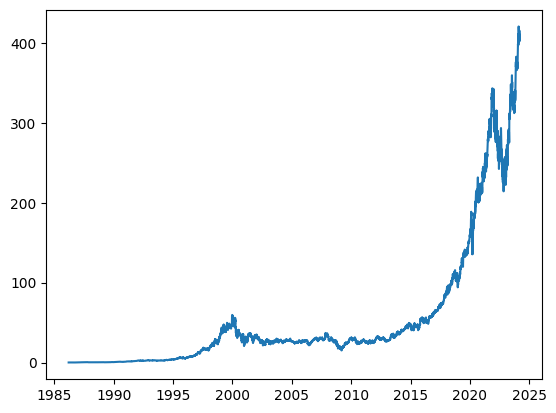

In [7]:
## Make a single plot to see the data

import matplotlib.pyplot as plt

plt.plot(df.index,df['Close'])

In [8]:
## Transform the DataSet into a Windowed Data Set 
## The n parameter is set to default as 3 and it represents the 3 previous period of the target date. 

import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [9]:
## Function to convert the dataset to array extracting the date, X, and y 

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    ## Extract the date
    
    dates = df_as_np[:,0]
    
    ## Extract the X values (need to reshape to use in TensorFlow)
    
    middle_matrix = df_as_np[:,1:-1]
    X = middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))
    
    ## Extract the y 
    
    y = df_as_np[:,-1]
    
    
    return dates, X.astype(np.float32), y.astype(np.float32)


dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape 

((252,), (252, 3, 1), (252,))

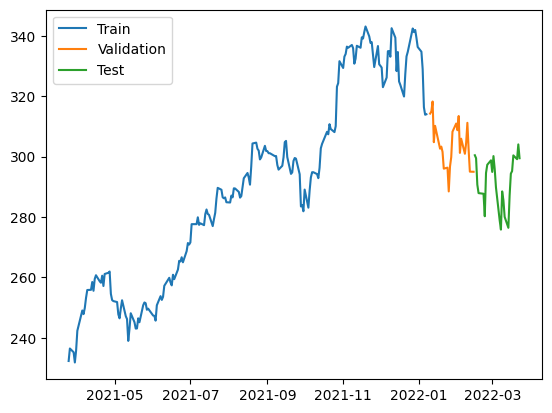

In [10]:
q_80 = int(len(dates) * .8) ## First 80% of the dataset
q_90 = int(len(dates) * .9) ## First 90% of the dataset

## Defining the trainin set 
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

## Defining the validation set
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

## Defining the test set
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

## Creates the model. The in the 1st layer the 3 is the size of the windows, and 1 is the quantity of variables of the model (univariate)
## in this case is only 1 because we only want the CLOSING, but it could be included more variavbles to predict. 
## The 2nd layer is the LSTM , need to be careful to avoid large numbers due overfit issues. 
## The 3rd and 4rd are dense layers with RELU activation functions
## the 5rd and last layer is a Dense with size 1, since we are predicting a single values

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])


## Loss funciton - we want to minimise the error (MSE)
## Optimizer is Adam that deals better with this type of problem we want to solve. 
## Metrics - mean absolute error what workes better with MSE 

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 33ms/step - loss: 84623.8438 - mean_absolute_error: 289.1599 - val_loss: 92344.3125 - val_mean_absolute_error: 303.7949
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 84432.3984 - mean_absolute_error: 288.8285 - val_loss: 92143.2812 - val_mean_absolute_error: 303.4638
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 84217.1562 - mean_absolute_error: 288.4556 - val_loss: 91862.0391 - val_mean_absolute_error: 303.0001
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 83893.5312 - mean_absolute_error: 287.8934 - val_loss: 91407.9766 - val_mean_absolute_error: 302.2499
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 83442.8438 - mean_absolute_error: 287.1089 - val_loss: 90927.2422 - val_mean_absolute_error: 301.4536
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 82973.2812 - mean_absolute_error: 286.2922 - val_loss: 90391.07

7/7 [==============================] - 0s 792us/step


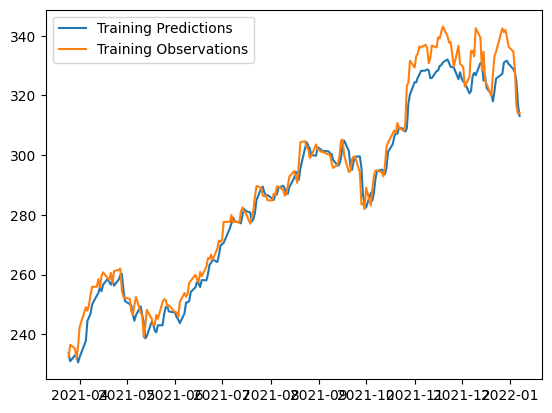

In [12]:
## Compares Training Data Performance x Training Predicted Performance

train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 10ms/step


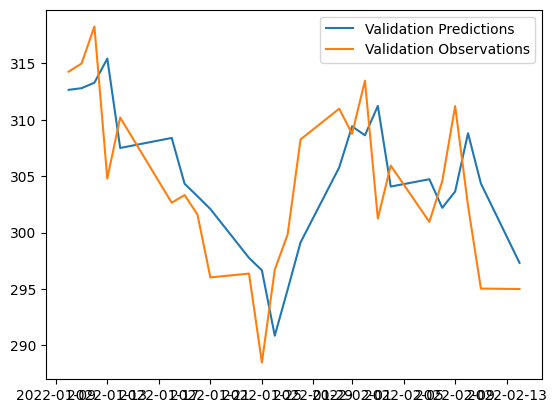

In [13]:
## Compares Validation Data Performance x Validation Predicted Performance

val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 11ms/step


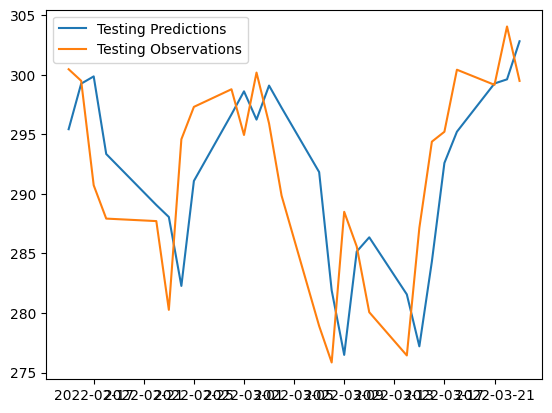

In [14]:
## Compares Test Data Performance x Test Predicted Performance

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

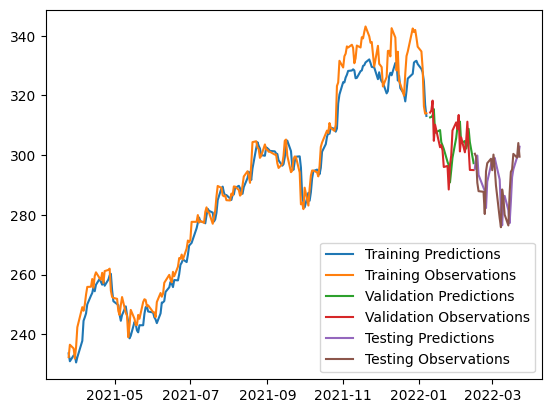

In [15]:
## Makes a Graph with all Observations x Predictions 

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

### Makes a Prediction for the Future using Recursive Prediction (previous predicted values is the parameter for the next predicted value)

In [16]:
## Makes the Recursive Prediction

from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 8ms/step


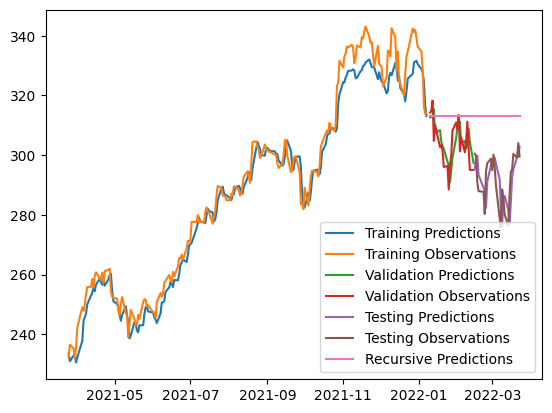

In [17]:
## Plot the Prediction Results 

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])